# Morpion Solitaire: exploration with a model

In [ ]:
import torch
from MorpionSolitaire import *
from tqdm.notebook import trange
import ipywidgets as widgets

In [ ]:
# from multiprocess import Pool
# pool = Pool()

## Model

In [ ]:
net = torch.load('models/Descartes.pt')
net.eval()

Sequential(
  (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 40, kernel_size=(2, 2), stride=(1, 1))
  (3): ReLU()
  (4): Conv2d(40, 40, kernel_size=(2, 2), stride=(1, 1))
  (5): ReLU()
  (6): Conv2d(40, 40, kernel_size=(2, 2), stride=(1, 1))
  (7): ReLU()
  (8): Conv2d(40, 40, kernel_size=(2, 2), stride=(1, 1))
  (9): ReLU()
  (10): AdaptiveAvgPool2d(output_size=1)
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=40, out_features=20, bias=True)
  (13): ReLU()
  (14): Linear(in_features=20, out_features=10, bias=True)
  (15): ReLU()
  (16): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
def count_moves(grids):
    with torch.no_grad():
        y = net(torch.tensor(grids).unsqueeze(1).float())
    return np.array(torch.round(5.0 * y / (1.0 - y)).squeeze())

## Game

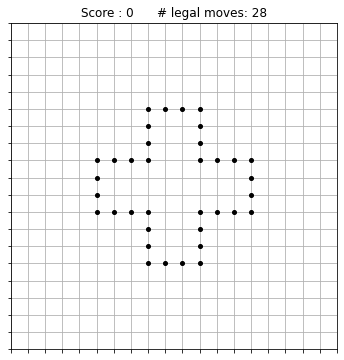

In [ ]:
game = NewGame()
game.print()

In [ ]:
len(game.moves)

28

In [ ]:
game.compute_weights(count_moves).tolist()

[27.0,
 27.0,
 26.0,
 26.0,
 26.0,
 27.0,
 27.0,
 26.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 26.0,
 27.0,
 27.0,
 26.0,
 26.0,
 26.0,
 27.0,
 27.0]

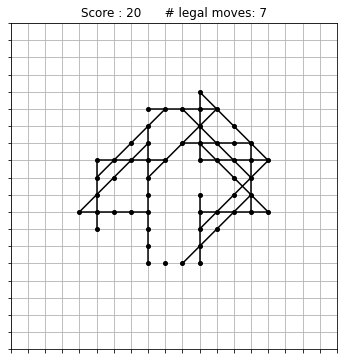

In [ ]:
game = game.play(17, depth = 20)
game.print()

In [ ]:
game.moves

[(13, 11, 1, 0),
 (13, 13, 4, 2),
 (18, 11, 1, 4),
 (16, 16, 4, 2),
 (18, 16, 4, 2),
 (19, 13, 2, 0),
 (19, 20, 2, 4)]

In [ ]:
game.compute_weights(count_moves).tolist()

[5.0, 6.0, 5.0, 9.0, 11.0, 6.0, 5.0]

## Best game so far

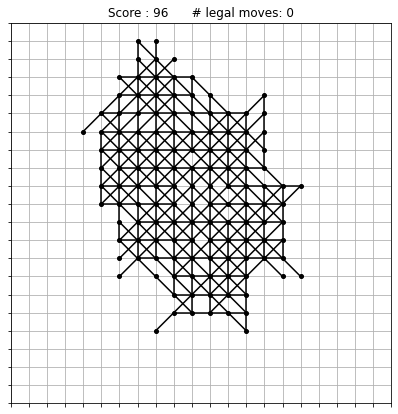

In [ ]:
best_game = NewGame().load('exploration_data/best_game_cross5.npy')
best_game.print(view = 22, figsize = 7)

In [ ]:
# best_game.grid.print(view = 22, figsize = 7)
# plt.savefig('blog/Part_5_Playing_model_images/Descartes_best_grid_'
#             + str(best_game.score) + '.png', bbox_inches='tight')

In [ ]:
# best_game.save('exploration_data/best_game')

## Exploration

In [ ]:
def play_one_game(t):
    global best_game
    game = NewGame().play(model = count_moves, t = t)
    if game.score > best_game.score:
        best_game = game
    return game.score

In [ ]:
# def play_games(t, n):
#     args = [t for _ in range(n)]
#     return pool.map(play_one_game, args) # does not work!

In [ ]:
def play_games(t, n):
    return [play_one_game(t) for _ in range(n)]

In [ ]:
def generate_data(trange, n):
    for t in trange:
        new_data = play_games(t, n)
        if str(t) in data:
            new_data.extend(data[str(t)])
        data[str(t)] = new_data
    return

Loading the data:

In [ ]:
t_list = [0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]
files = [('exploration_data/Descartes_' + str(t) + '.npy', t) for t in t_list]
data = {}
for f in files:
    print(f[0])
    data[str(f[1])] = np.load(f[0]).tolist()

exploration_data/Descartes_0.0001.npy
exploration_data/Descartes_0.001.npy
exploration_data/Descartes_0.003.npy
exploration_data/Descartes_0.01.npy
exploration_data/Descartes_0.03.npy
exploration_data/Descartes_0.1.npy
exploration_data/Descartes_0.3.npy
exploration_data/Descartes_1.0.npy
exploration_data/Descartes_3.0.npy
exploration_data/Descartes_10.0.npy


In [ ]:
# generate_data([0.001, 0.01, 0.1, 1.0, 10.0], 100)

Number of games for each value of `t`:

In [ ]:
[(t, len(data[t])) for t in data]

[('0.0001', 5000),
 ('0.001', 1000),
 ('0.003', 1000),
 ('0.01', 10000),
 ('0.03', 1000),
 ('0.1', 1000),
 ('0.3', 1000),
 ('1.0', 1000),
 ('3.0', 1000),
 ('10.0', 1000)]

Saving the data:

In [ ]:
# for t in data:
#     file = 'exploration_data/Descartes_' + t + '.npy'
#     np.save(file, np.array(data[t]))
#     print(file)

## Statistics

In [ ]:
def mean(list):
    return np.mean(np.array(list))
def maximum(list):
    return np.max(np.array(list))
def mean_above(list, cutoff):
    return mean([x for x in list if x >= cutoff])
def count_above(list, cutoff):
    return mean([x >= cutoff for x in list])

In [ ]:
data_avg = [(1 / float(t), mean(data[t])) for t in data]
data_avg

[(10000.0, 64.3642),
 (1000.0, 64.576),
 (333.3333333333333, 64.235),
 (100.0, 64.3769),
 (33.333333333333336, 63.991),
 (10.0, 64.748),
 (3.3333333333333335, 63.385),
 (1.0, 61.252),
 (0.3333333333333333, 57.517),
 (0.1, 55.833)]

In [ ]:
data_max = [(1 / float(t), maximum(data[t])) for t in data]
data_max

[(10000.0, 89),
 (1000.0, 86),
 (333.3333333333333, 96),
 (100.0, 89),
 (33.333333333333336, 85),
 (10.0, 88),
 (3.3333333333333335, 89),
 (1.0, 83),
 (0.3333333333333333, 78),
 (0.1, 83)]

In [ ]:
data_above70 = [(1 / float(t), count_above(data[t], 70)) for t in data]
data_above70

[(10000.0, 0.1804),
 (1000.0, 0.17),
 (333.3333333333333, 0.178),
 (100.0, 0.1784),
 (33.333333333333336, 0.167),
 (10.0, 0.172),
 (3.3333333333333335, 0.152),
 (1.0, 0.12),
 (0.3333333333333333, 0.076),
 (0.1, 0.05)]

In [ ]:
rand_dist = np.load('random_exploration_data/rand_distribution.npy')
data_above70_random = np.sum(rand_dist[70:]) / np.sum(rand_dist)

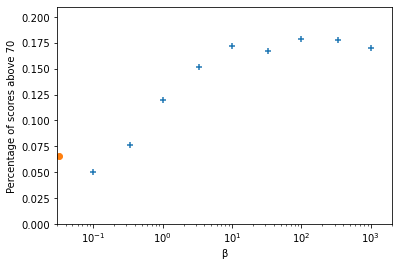

In [ ]:
plt.scatter([x[0] for x in data_above70], [x[1] for x in data_above70], marker = '+')
plt.scatter(0.032, data_above70_random)
plt.xlabel('β')
plt.xscale('log')
plt.xlim(0.03, 2000.0)
plt.ylabel('Percentage of scores above 70')
plt.ylim(0, 0.21)
# plt.savefig('blog/Part_5_Playing_model_images/Descartes_exploration_t.png', bbox_inches='tight')
plt.show()

## Figures

In [ ]:
maxscore = 100
frequency_x = np.array(range(maxscore + 1))

In [ ]:
frequency_inf = np.load('random_exploration_data/rand_distribution.npy')
if frequency_inf.shape[0] < maxscore + 1:
    frequency_inf = np.concatenate((frequency_inf, np.zeros(maxscore + 1 - frequency_inf.shape[0])))

In [ ]:
def frequency(scores):
    f = np.histogram(scores, bins = maxscore + 1,
                     range = (-0.5, maxscore + 0.5))[0]
    return f / f.sum()

In [ ]:
frequency_data = {}
for t in data:
    frequency_data[t] = frequency(data[t])

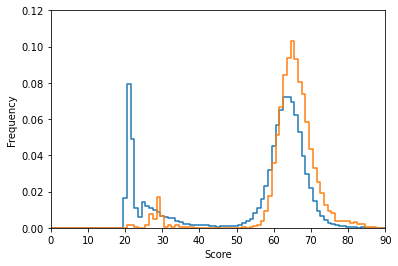

In [ ]:
plt.step(frequency_x, frequency_inf, where='mid')
plt.step(frequency_x, frequency_data['0.01'], where='mid')
# plt.step(frequency_x, frequency_data['0.0001'], where='mid')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 90)
plt.ylim(0, 0.12)
# plt.savefig('blog/Part_5_Playing_model_images/Descartes_exploration_0.01.png', bbox_inches='tight')
plt.show()

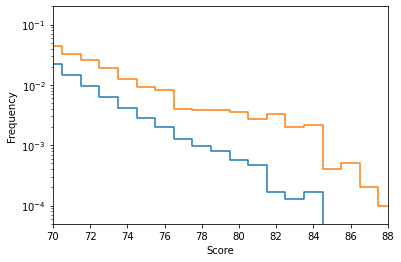

In [ ]:
xmin, xmax = 70, 89
plt.step(frequency_x[xmin:xmax], frequency_inf[xmin:xmax], where='mid')
plt.step(frequency_x[xmin:xmax], frequency_data['0.01'][xmin:xmax], where='mid')
# plt.step(frequency_x[xmin:xmax], frequency_data['0.001'][xmin:xmax], where='mid')
plt.yscale('log')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax - 1)
plt.ylim(0.00005, 0.2)
# plt.savefig('blog/Part_5_Playing_model_images/Descartes_exploration_0.01_log.png', bbox_inches='tight')
plt.show()

In [ ]:
# xmin, xmax = 70, 86
# xyfit = np.polyfit(frequency_x[xmin:xmax], np.log(frequency_inf[xmin:xmax]), 1)
# xyfit[0], xyfit[1]

In [ ]:
xmin, xmax = 70, 86
xyfit = np.polyfit(frequency_x[xmin:xmax], np.log(frequency_data['0.01'][xmin:xmax]), 1)
xyfit[0], xyfit[1]

(-0.2464082433631749, 13.966389845563484)

In [ ]:
x0 = np.array([xmin, xmax])
y0 = np.exp(xyfit[0] * x0 + xyfit[1])

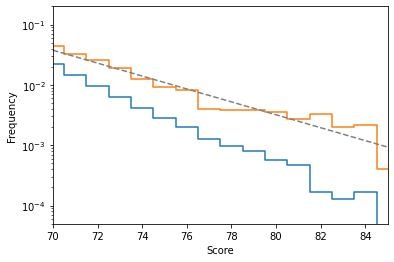

In [ ]:
xmin, xmax = 70, 86
plt.step(frequency_x[xmin:xmax], frequency_inf[xmin:xmax], where='mid')
plt.step(frequency_x[xmin:xmax], frequency_data['0.01'][xmin:xmax], where='mid')
plt.plot(x0, y0, '--', color='grey')
plt.yscale('log')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(xmin, xmax - 1)
plt.ylim(0.00005, 0.2)
# plt.savefig('blog/Part_5_Playing_model_images/Descartes_exploration_0.01_log.png', bbox_inches='tight')
plt.show()

This gives an estimate of how many games one needs to play to reach a given score:

In [ ]:
def required_n(goal):
    return np.round(1.0 / np.exp(xyfit[0] * goal + xyfit[1]))

In [ ]:
required_n(70), required_n(80), required_n(90), required_n(100)

(27.0, 313.0, 3679.0, 43236.0)